# TP1 (Code du Perceptron) - Apprentissage automatique 2

# Membres du groupe


1.   GUIDIBI Teddy
2.   JALAL Alaeddine
3.   KHATIB Asmaa
4.   MONKOUN Aris
5.   ROUDRI Chaimae

# Importations

In [169]:
import time
import numpy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# Jeu de données linéairement séparable

## Génération

In [170]:
n_samples = 200 

In [171]:
blobs = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=80)

## Features

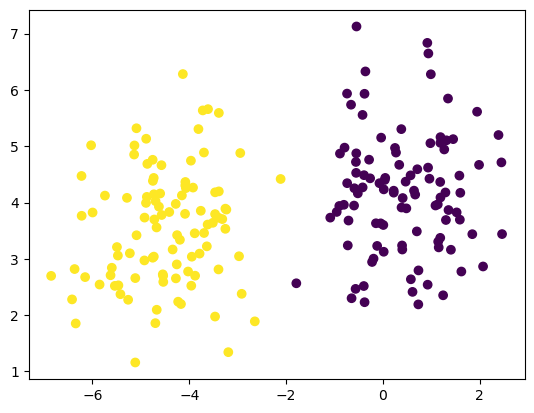

In [172]:
pyplot.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1].tolist())
pyplot.show()

## Labels

In [173]:
labels=blobs[1].tolist()
labels[0:10] #Les 10 premiers labels

[1, 1, 1, 1, 0, 1, 0, 1, 0, 1]

On a effectivement 2 classes: 0, 1. Mais on aimerait avoir des labels -1 et 1.
Pour cela, on a créé un mapper.

In [174]:
def label_mapper(i):
    if i==0:
        return -1
    else:
        return 1

In [175]:
labels=list(map(label_mapper,labels))
labels[0:10] #Les 10 premiers labels

[1, 1, 1, 1, -1, 1, -1, 1, -1, 1]

# Perceptron class

In [176]:
class Perceptron():
    
    def __init__(self):
        pass
    
    def set_variables(self,X,Y, init_weights=True):
        #Initialisation des poids est False par défaut
        self.X=X
        self.X_dim=len(X[0])
        self.Y=Y
        
        if(init_weights):
            self.w=[0]*self.X_dim
            self.w0=0
            self.treshold_= 0.0
        
    def model(self, Xi):
        return numpy.dot(self.w, Xi) + self.w0
    
    def decision_function(self, Xi):
        Yi=self.model(Xi)
        if (Yi > self.treshold_):
            return 1
        if (Yi < self.treshold_):
            return -1
        else:
            return 0    
    
    def loss(self, Xi, Yi):
        return max((-1)*self.decision_function(Xi)*Yi,0)
    
    def mean_loss(self, X_list, Y_pred_list):
        loss_=0
        for i in range(len(X_list)):
            loss_+=self.loss(X_list[i],Y_pred_list[i])
        return loss_/len(X_list)
    
    def fit(self, X, Y, learning_rate, init_weights=True):
        
        self.set_variables(X, Y, init_weights=init_weights)
        
        while(True):
            nb_errors=0
            
            for i in range(len(self.X)):
                if (self.Y[i]*self.decision_function(self.X[i]) <=0 ):
                    nb_errors+=1
                    self.w = self.w + learning_rate*self.Y[i]*self.X[i]
                    self.w0 = self.w0 + learning_rate*self.Y[i]
            if(nb_errors==0):
                break
    
    def predict(self, X_test):
        return([self.decision_function(x) for x in X_test])
    
    def score(self, X_test, Y_test):
        return 1-self.mean_loss(X_test, Y_test)

# Execution

## Avant l'apprentissage

In [177]:
P=Perceptron()
P.set_variables(X=blobs[0], Y=labels)

In [178]:
P.w

[0, 0]

In [179]:
P.w0

0

In [180]:
P.decision_function(blobs[0][0,:])

0

In [181]:
labels[0]

1

Le premier point est toujours mal classifié

## Echantillonage

In [182]:
X_train, X_test, y_train, y_test = train_test_split(blobs[0], labels, test_size=0.2, random_state=42)

## Apprentissage

In [183]:
P.fit(X=X_train, Y=y_train, init_weights=True, learning_rate=1)

## Après l'apprentissage

In [184]:
P.w

array([-13.16167029,  -5.96641929])

In [185]:
P.w0

-1

In [186]:
P.decision_function(blobs[0][0,:])

1

In [187]:
labels[0]

1

Classification bien faite pour ce point

# Evaluation

In [188]:
predicted_labels=P.predict(X_test)
predicted_labels[0:10] #Les 10 premiers labels

[-1, -1, -1, 1, 1, 1, -1, -1, 1, -1]

In [189]:
P.score(X_test,y_test)

0.975

# Visualisation du nombre de points bien classées pour chaque classe

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn

<AxesSubplot:>

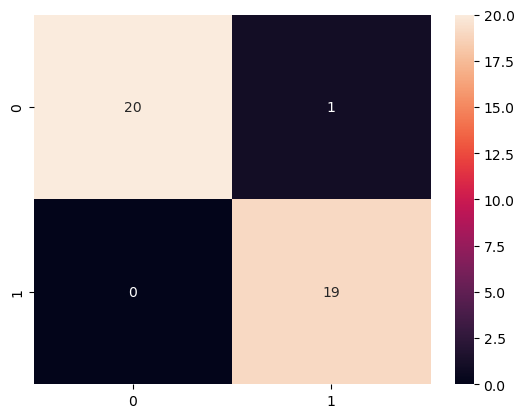

In [191]:
confusion_matrix_=confusion_matrix(y_test, predicted_labels)

seaborn.heatmap(confusion_matrix_, annot=True)

* 20 points de la première classe classifiés dans la première
* 1 point de la première classe classifié dans la deuxième
* 0 points de la deuxième classe classifiés dans la première
* 19 points de la deuxième classe classifiés dans la deuxième

In [192]:
import matplotlib.pyplot as plt

In [193]:
line_x=numpy.arange(-3,0,0.2)
line_y= P.w0/P.w[1] -(P.w[0]/P.w[1])*line_x

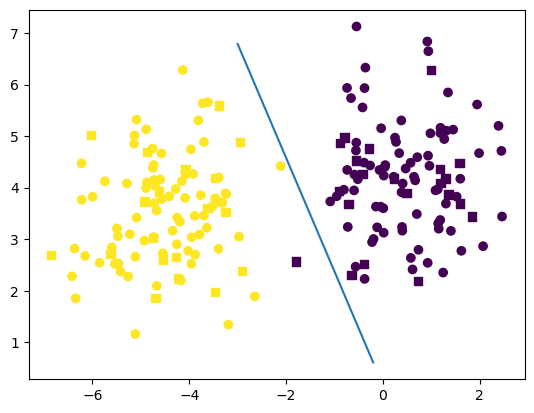

In [194]:
pyplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s')
pyplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')

pyplot.plot(line_x, line_y)
pyplot.show()

# Ajout d'une nouvelle ligne au jeu de données

In [195]:
X_train=numpy.vstack((X_train,X_test[0]))
X_test=numpy.delete(X_test, (0), axis=0)

y_train.append(y_test[0])
y_test=y_test.pop(0)

## Reinitisalition de X et Y sans initisalition des poids

In [196]:
start=time.perf_counter()
P.fit(X=X_train, Y=y_train, init_weights=False, learning_rate=1)
end=time.perf_counter()
print(end-start)

0.002700999999888154


## Reinitisalition de X et Y avec initisalition des poids

In [197]:
start=time.perf_counter()
P.fit(X=X_train, Y=y_train, init_weights=True, learning_rate=1)
end=time.perf_counter()
print(end-start) 

0.007699200000388373


Là on remarque que quand une partie du jeu de données est déjà entrainée, les nouveaux poids pour la classification se trouvent plus rapidement

# Inversion des classes

In [198]:
def label_invertion(i):
    if i==1:
        return -1
    else:
        return 1

In [199]:
y_train=list(map(label_invertion,y_train))
y_train[0:10] #Les 10 premiers labels

[-1, 1, -1, 1, -1, -1, -1, -1, -1, 1]

In [200]:
P.fit(X=X_train, Y=y_train, init_weights=True, learning_rate=1)

In [201]:
P.w

array([13.16167029,  5.96641929])

In [202]:
P.w0

1

Après inversion des classes, la normale et le biais changent de signe.